# E1

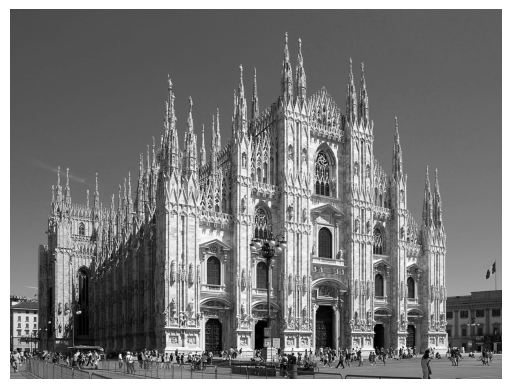

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

image_path = "duomo.jpg"
img = imread(image_path)
A = np.mean(np.array(img, dtype=np.float64) / 255, axis=-1)
plt.imshow(A, cmap="gray")
plt.axis("off")
A.shape

random_seed = 0

- 1: SVD and randomized SVD

Exact SVD:

Text(0.5, 1.0, 'explained variance')

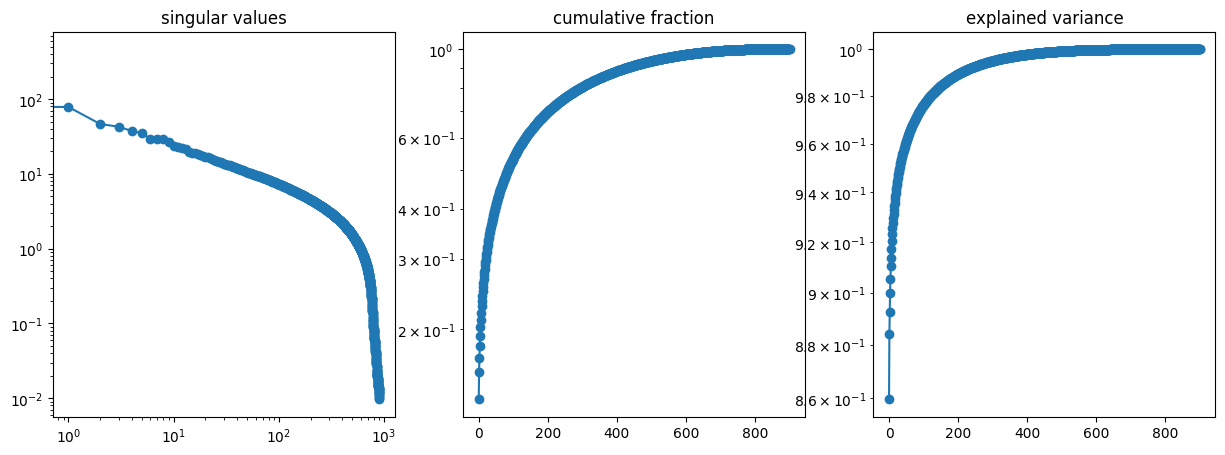

In [2]:
U, s, VT = np.linalg.svd(A, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].loglog(s, "o-")
axs[0].set_title("singular values")
axs[1].semilogy(np.cumsum(s) / np.sum(s), "o-")
axs[1].set_title("cumulative fraction")
axs[2].semilogy(np.cumsum(s**2) / np.sum(s**2), "o-")
axs[2].set_title("explained variance")

Randomized SVD:

In [3]:
def randomized_SVD(A, k):
    np.random.seed(random_seed)
    # print("k = ", k)
    m, n = A.shape
    # print(f"Shape of matrix A: m = {m}, n = {n}")

    # create a random matrix
    omega = np.random.rand(n, k)
    # print(f"shape of matrix Omega: ", omega.shape)
    Y = A @ omega
    # print("shape of matrix Y = A @ Omega (should be m * k): ", Y.shape)
    # default mode of qr factorization: reduced --> that's what I'm interested in
    Q, R = np.linalg.qr(Y)
    # print("Shape of matrix Q: ", Q.shape)
    B = Q.T @ A
    # print("Shape of matrix B: ", B.shape)

    # perform the SVD on B
    rU, rs, rVT = np.linalg.svd(B, full_matrices=False)

    # recover left singular values
    rU = Q @ rU

    # print("Shape of matrix rU: ", rU.shape)
    # print("Shape of vector rs: ", rs.shape)
    # print("Shape of matrix rVT: ", rVT.shape)
    return rU, rs, rVT

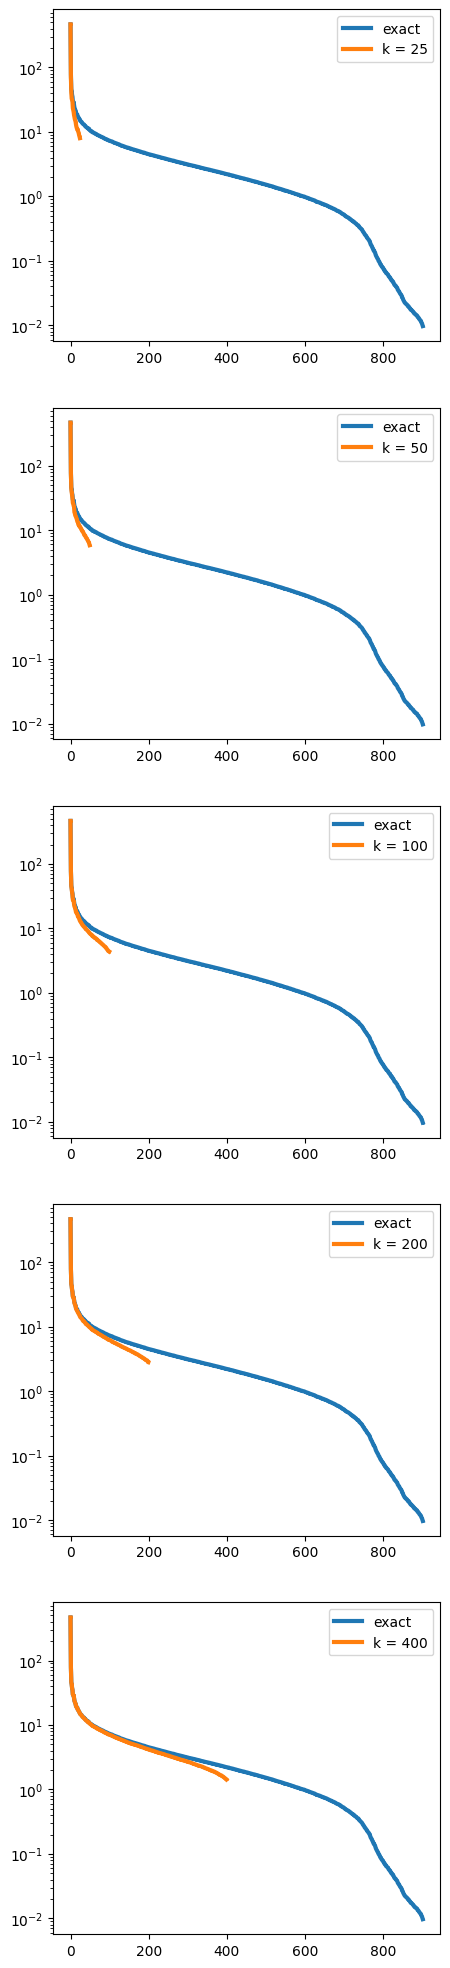

In [4]:
ks = [25, 50, 100, 200, 400]

rs_array = list()

for k in ks:
    _, rs, _ = randomized_SVD(A, k)
    rs_array.append(rs)

fig, axs = plt.subplots(len(ks), 1, figsize=(5, 5 * len(ks)))

i = 0
for rs in rs_array:
    axs[i].plot(s, "o-", label="exact", linewidth=3, markersize=1)
    axs[i].semilogy(rs, "o-", label="k = %d" % ks[i], linewidth=3, markersize=1)
    axs[i].legend()
    i += 1

We can see that as the rank k of the randomized SVD algorithm increases, the approximation of the singular values becomes more and more accurate.

There is an overall underestimation of the singular values (i.e. less variability is captured), but the approximation is still very good.

- 2: Compress the matrix.

Compression with exact SVD:

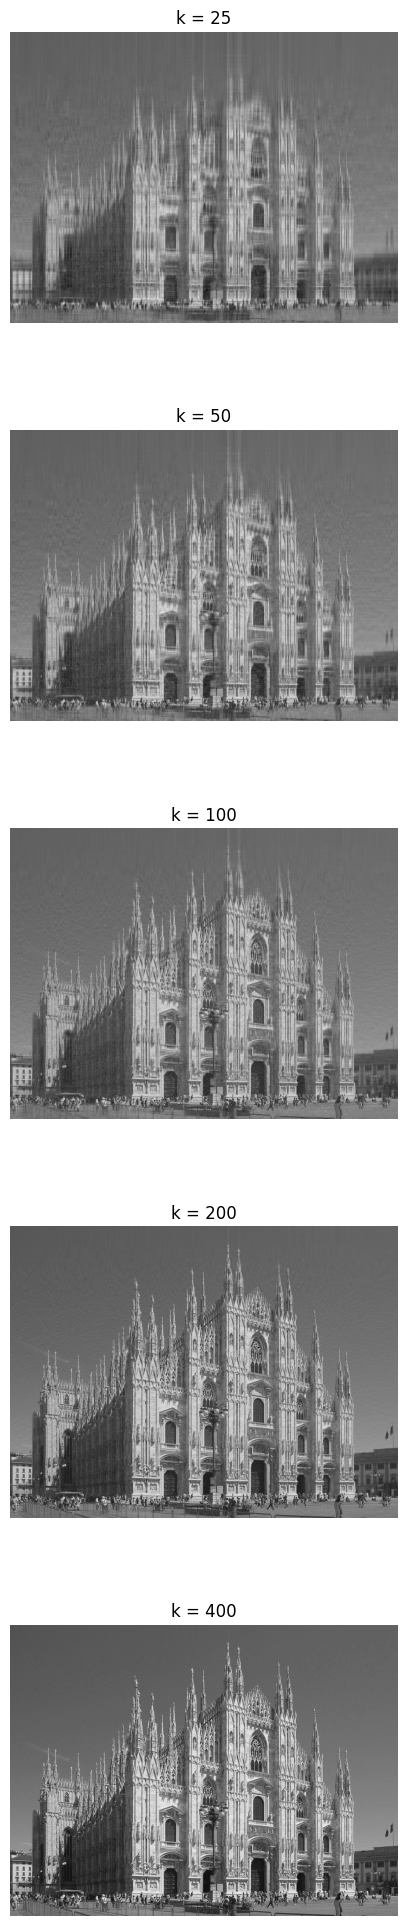

In [5]:
ks = [25, 50, 100, 200, 400]

fig, axs = plt.subplots(len(ks), 1, figsize=(5, 5 * len(ks)))

U, s, VT = np.linalg.svd(A, full_matrices=False)
i = 0
reconstruction_error_exact = list()
for k in ks:
    Ak = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    reconstruction_error_exact.append(
        np.linalg.norm(A - Ak, ord=2) / np.linalg.norm(A, ord=2)
    )
    axs[i].imshow(Ak, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("k = %d" % k)
    i += 1

Compression with randomized SVD:

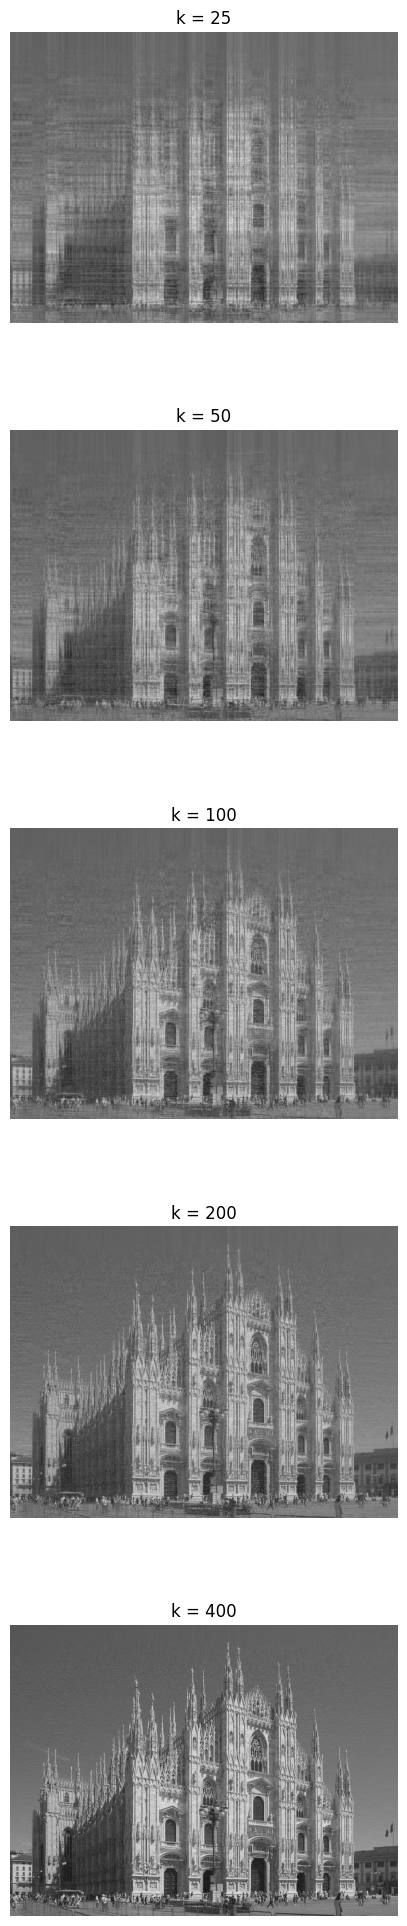

In [6]:
ks = [25, 50, 100, 200, 400]

fig, axs = plt.subplots(len(ks), 1, figsize=(5, 5 * len(ks)))

i = 0
reconstruction_error_rand = list()
for k in ks:
    rU, rs, rVT = randomized_SVD(A, k)
    Ak = rU @ np.diag(rs) @ rVT
    reconstruction_error_rand.append(
        np.linalg.norm(A - Ak, ord=2) / np.linalg.norm(A, ord=2)
    )
    axs[i].imshow(Ak, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("k = %d" % k)
    i += 1

Compress with randomized SVD with 50% oversampling:

In [7]:
def randomized_SVD_oversampling(A, k):
    np.random.seed(random_seed)
    # print("k = ", k)
    m, n = A.shape
    # print(f"Shape of matrix A: m = {m}, n = {n}")

    # create a random matrix
    omega = np.random.rand(n, round(k * 1.5))
    # print(f"shape of matrix Omega: ", omega.shape)
    Y = A @ omega
    # print("shape of matrix Y = A @ Omega (should be m * k): ", Y.shape)
    # default mode of qr factorization: reduced --> that's what I'm interested in
    Q, R = np.linalg.qr(Y)
    # print("Shape of matrix Q: ", Q.shape)
    B = Q.T @ A
    # print("Shape of matrix B: ", B.shape)

    # perform the SVD on B
    rU, rs, rVT = np.linalg.svd(B, full_matrices=False)

    # recover left singular values
    rU = Q @ rU

    # print("Shape of matrix rU: ", rU.shape)
    # print("Shape of vector rs: ", rs.shape)
    # print("Shape of matrix rVT: ", rVT.shape)
    return rU, rs, rVT

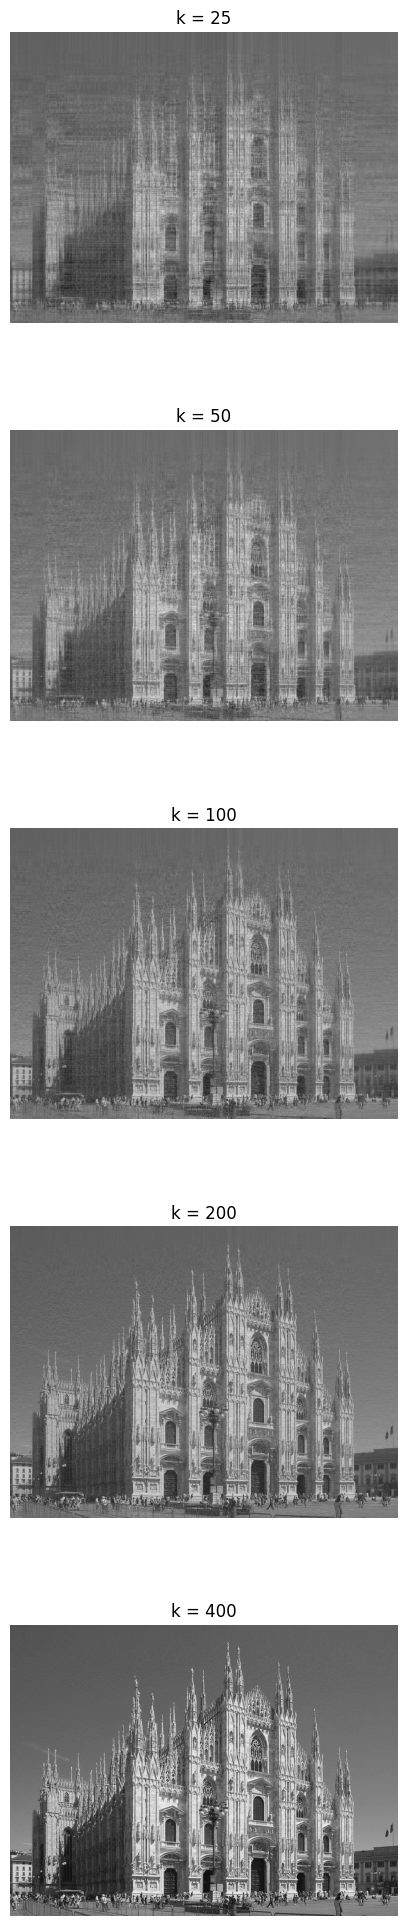

In [8]:
ks = [25, 50, 100, 200, 400]

fig, axs = plt.subplots(len(ks), 1, figsize=(5, 5 * len(ks)))

i = 0
reconstruction_error_rand_oversampling = list()
for k in ks:
    rU, rs, rVT = randomized_SVD_oversampling(A, k)
    Ak = rU @ np.diag(rs) @ rVT
    reconstruction_error_rand_oversampling.append(
        np.linalg.norm(A - Ak, ord=2) / np.linalg.norm(A, ord=2)
    )
    axs[i].imshow(Ak, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("k = %d" % k)
    i += 1

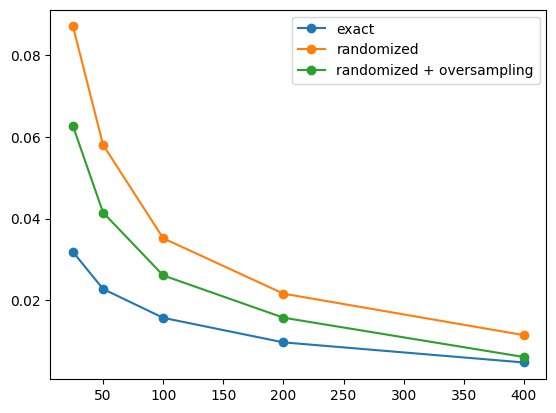

In [9]:
plt.plot(ks, reconstruction_error_exact, "o-", label="exact")
plt.plot(ks, reconstruction_error_rand, "o-", label="randomized")
plt.plot(
    ks, reconstruction_error_rand_oversampling, "o-", label="randomized + oversampling"
)
plt.legend()

As we can see, the exact SVD (blue line) is the algorithm that gives the smallest reconstruction error, as expected by the Eckart-Young theorem.
The randomized SVD (orange line) gives a higher reconstruction error, but both have the same order of magnitude.
Finally, the randomized SVD with oversampling gives an in between in terms of reconstruction error.
We expect however that the two randomized algorithms improved the time needed to compute the SVD.


We can also see that as the number of singular values used rises, the differences in term of reconstruction error starts to converge.

- 3: Time needed to compute the SVD for the three algorithms at k = 200

Exact SVD time:

In [10]:
import time

t0 = time.time()
U, s, VT = np.linalg.svd(A, full_matrices=False)
t1 = time.time()
exact_time = t1 - t0
print("Exact SVD took %f seconds" % exact_time)

Exact SVD took 0.314194 seconds


Randomized SVD time:

In [11]:
t0 = time.time()
rU, rs, rVT = randomized_SVD(A, 200)
t1 = time.time()
rand_time = t1 - t0
print("Randomized SVD took %f seconds" % rand_time)

Randomized SVD took 0.052353 seconds


Randomized SVD with oversampling time:

In [12]:
t0 = time.time()
rU, rs, rVT = randomized_SVD_oversampling(A, 200)
t1 = time.time()
rand_oversampling_time = t1 - t0
print("Randomized SVD with oversampling took %f seconds" % rand_oversampling_time)

Randomized SVD with oversampling took 0.084466 seconds


As we expected, the time taken to compute the exact SVD is high when compared to the randomized SVD algorithms (with and without oversampling).